# ADS Lab 4 - Data Exploration

### Acknowledgement: This notebook is based on Ruairi Fox's solution to the data exploration lab tasks

In [1]:
import numpy as np 
import pandas as pd 

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.io import loadmat
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

# From PyPI
# !pip install tsne

# From Conda
# ! conda install -c conda-forge tsne 

# from tsne import bh_sne
from sklearn.manifold import TSNE

# Load MNIST data

In [2]:
mnist_train = loadmat('mnist/mnist_train.mat')
mnist_test = loadmat('mnist/mnist_test.mat')
X_train = mnist_train['train_X']
y_train = mnist_train['train_labels'].ravel()

y_train[y_train == 10] = 0 # I notice the labels have a value '10'. I update it to '0'
Xs, ys = shuffle(X_train, y_train, n_samples=1000, random_state=0) # Randomly selecting 1000 samples

FileNotFoundError: [Errno 2] No such file or directory: 'mnist/mnist_train.mat'

In [3]:
df_mnist_train = pd.DataFrame(Xs)
df_mnist_train['label']=ys
print(df_mnist_train['label'].unique())

[1 4 0 2 7 6 5 9 8 3]


# Understanding the data

In [4]:
df_mnist_train.head(n=5) # List first five rows

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7


### Uncomment the relevant code lines below and execute to print more description about the data

In [5]:
# Information about the data

df_mnist_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 785 entries, 0 to label
dtypes: float64(784), uint8(1)
memory usage: 6.0 MB


In [6]:
# Get the data shape

df_mnist_train.shape


(1000, 785)

In [7]:
# List columns

df_mnist_train.columns

Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
           775,     776,     777,     778,     779,     780,     781,     782,
           783, 'label'],
      dtype='object', length=785)

In [8]:
# List counts

df_mnist_train.count()

0        1000
1        1000
2        1000
3        1000
4        1000
         ... 
780      1000
781      1000
782      1000
783      1000
label    1000
Length: 785, dtype: int64

In [9]:
# Print basic statistics of the data
df_mnist_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,...,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.465000
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.014543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.882895
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.447059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.000000


In [10]:
# MNIST dataset has ten digits. 

print(df_mnist_train['label'].unique())

[1 4 0 2 7 6 5 9 8 3]


# Plotting Functions

Note: In the plotting function below the code to print numbers is commented to speed the execution

In [11]:
def scatter2d(X, y):
    fig, ax = plt.subplots(figsize=(15,10))
    ax.scatter(X[:,0], X[:,1], c=y)
    palette = sns.color_palette("husl", len(np.unique(y)))

#     for i in range(len(y)):
#         ax.text(X[i,0], X[i,1], y[i], color=palette[y[i]-1], fontsize='small')
    
    
        
def scatter3d(X, y):
    fig = plt.figure(figsize=(15,10))
    fig.add_subplot(111, projection='3d')
    ax = Axes3D(fig)
    palette = sns.color_palette("husl", len(np.unique(y)))

    ax.mouse_init()
    ax.scatter(X[:,0], X[:,1], X[:,2], c=y)

#     for i in range(len(y)):
#         ax.text(X[i,0], X[i,1], X[i,2], y[i], color=palette[y[i]-1], fontsize='small')    

# Principal Component Analysis

PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.

Explained variance [5.11687301 3.74139083]
Explained variance ratio: [0.09704664 0.07095924]
Cumulative [0.09704664 0.16800588]


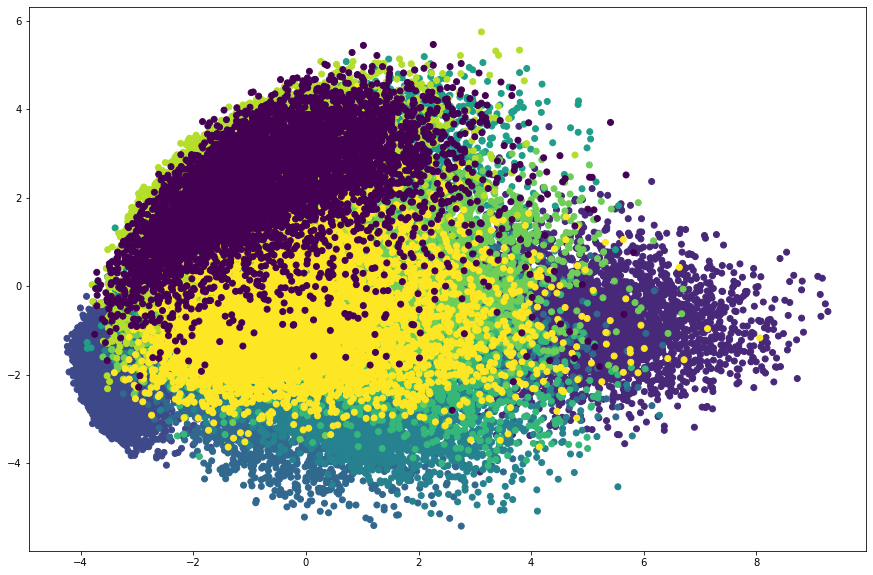

In [12]:
###
#Your code here. Try PCA with two components
pca = PCA(n_components = 2)
pca.fit(X_train)
X_r = pca.transform(X_train)
print('Explained variance', pca.explained_variance_) 
print('Explained variance ratio:', pca.explained_variance_ratio_)
print('Cumulative', pca.explained_variance_ratio_.cumsum())

scatter2d(X_r, y_train)



### To getter a better understanding of interaction of the dimensions plot the first three PCA dimensions

Explained variance [5.11687301 3.74139083 3.25270844]
Explained variance ratio: [0.09704664 0.07095924 0.06169089]
Cumulative [0.09704664 0.16800588 0.22969677]


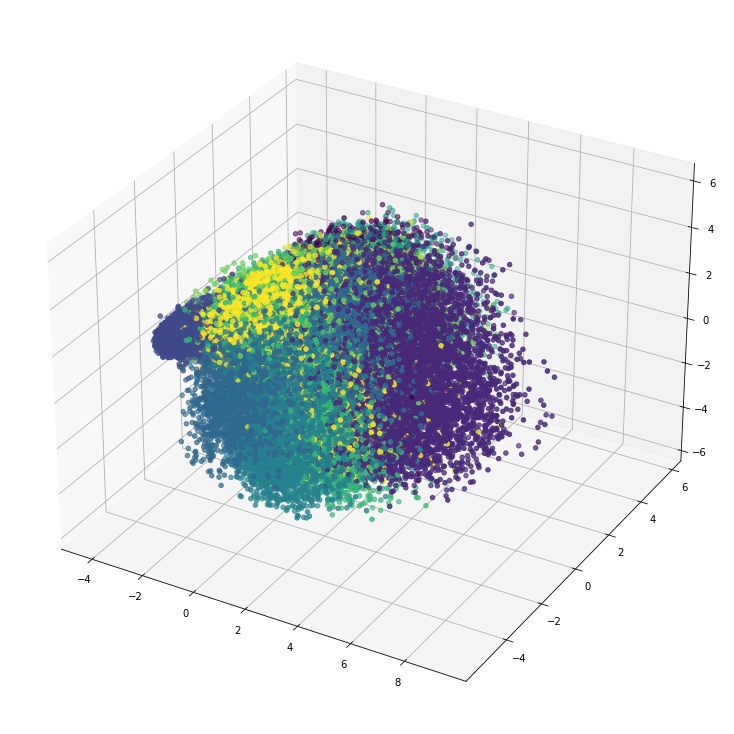

In [13]:
###
#Your code here. Try PCA with three components
###
pca = PCA(n_components = 3)
pca.fit(X_train)
X_r = pca.transform(X_train)
print('Explained variance', pca.explained_variance_) 
print('Explained variance ratio:', pca.explained_variance_ratio_)
print('Cumulative', pca.explained_variance_ratio_.cumsum())

scatter3d(X_r, y_train)



# t-SNE on the MNIST dataset

In [14]:
###
#Your code here. Try t-SNE with two components
###
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
%time P = model.fit_transform(Xs)


CPU times: user 23.9 s, sys: 153 ms, total: 24 s
Wall time: 3.12 s


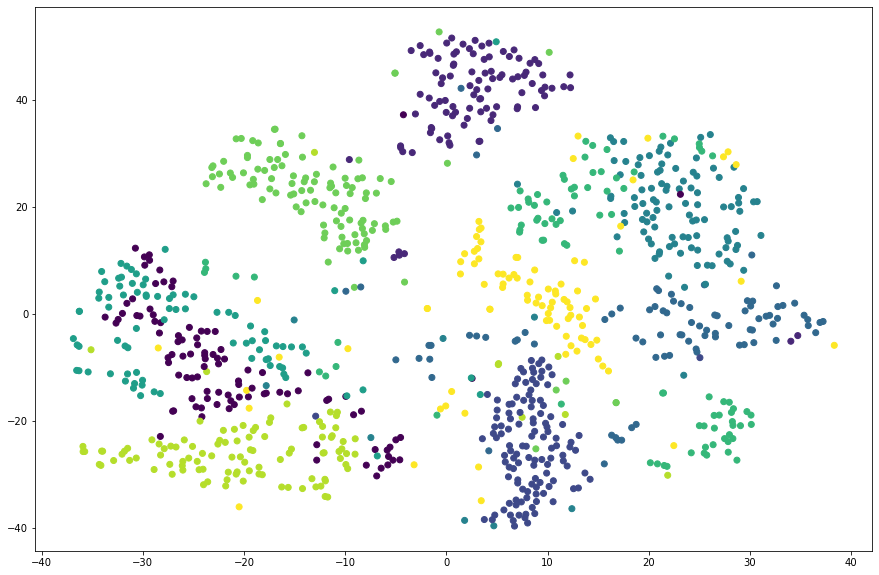

In [15]:
# Plot 2d
scatter2d(P, ys)


In [16]:
###
#Your code here. Try t-SNE with three components
###
model = TSNE(n_components=3, random_state=0)
np.set_printoptions(suppress=True)
%time P = model.fit_transform(Xs)


CPU times: user 59.3 s, sys: 389 ms, total: 59.7 s
Wall time: 6.2 s


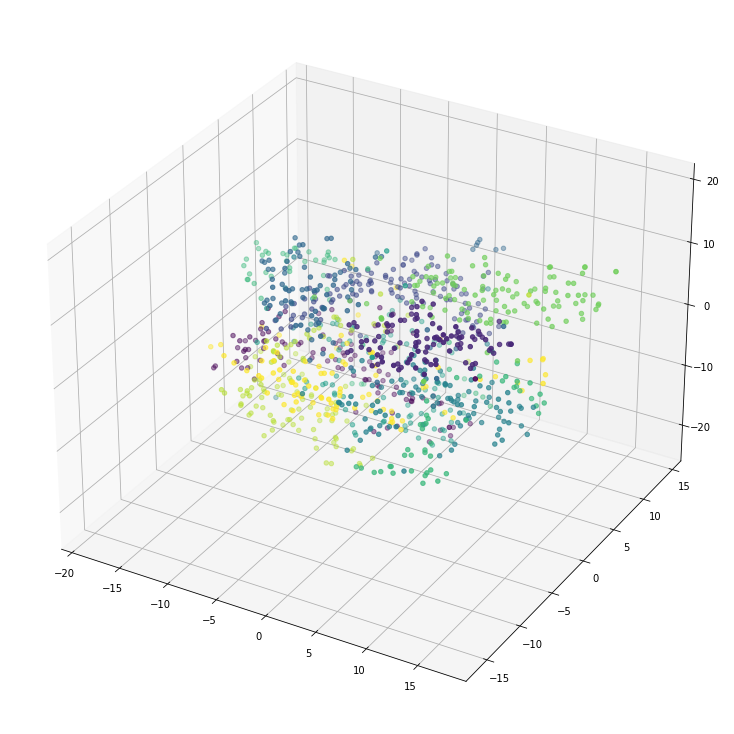

In [17]:
# Plot 3d
scatter3d(P, ys)

## Exploration Tasks

t-SNE offers others parameters including perplexity. The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Try varying perplexity and observe the changes in the output

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html?highlight=tsne#
    

CPU times: user 19 s, sys: 177 ms, total: 19.2 s
Wall time: 2.72 s
CPU times: user 26.4 s, sys: 268 ms, total: 26.7 s
Wall time: 3.22 s


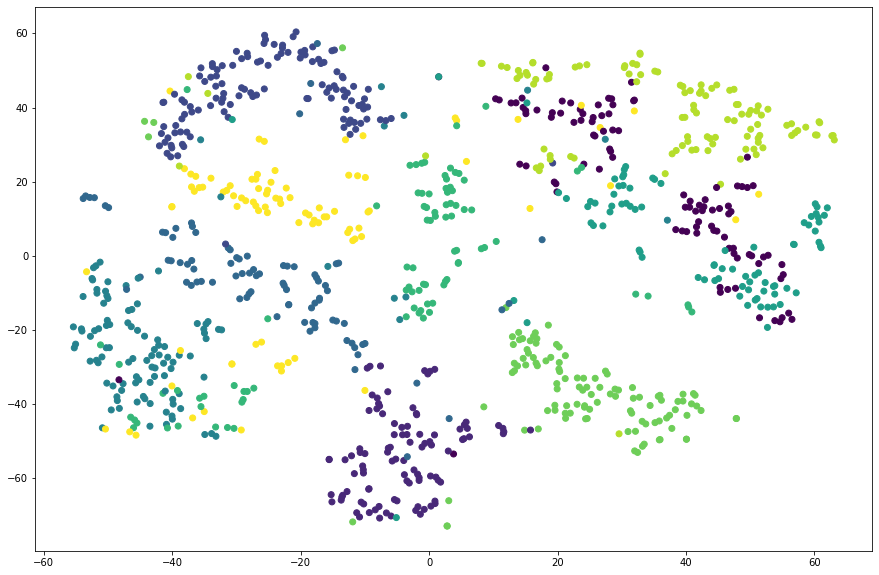

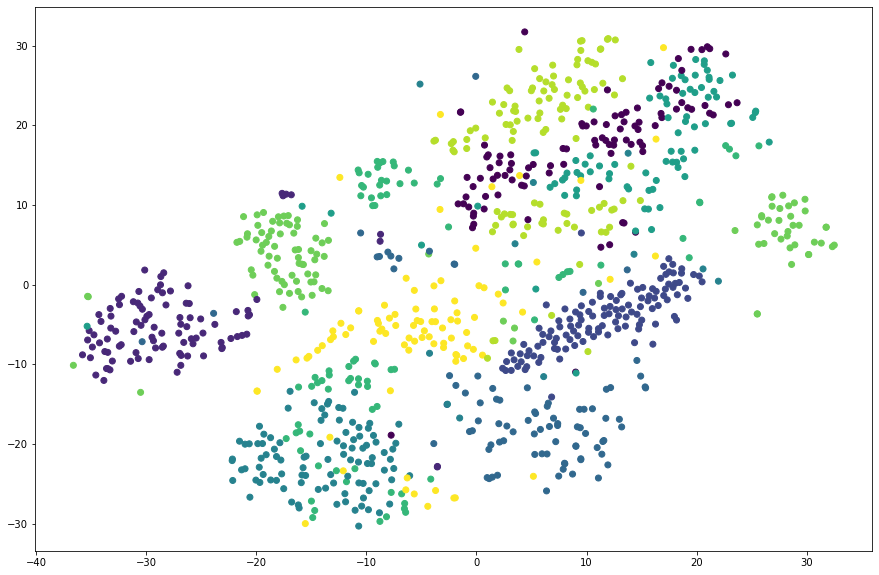

In [18]:
###
#Your code here
# Let us compare the plots by varying the perplexity. Default is 30.
###

model = TSNE(n_components=2, random_state=0, perplexity=10)
np.set_printoptions(suppress=True)
%time P = model.fit_transform(Xs)

# Plot 2d
scatter2d(P, ys)

model = TSNE(n_components=2, random_state=0, perplexity=50)
np.set_printoptions(suppress=True)
%time P = model.fit_transform(Xs)

# Plot 2d
scatter2d(P, ys)

### Run Barnes-Hut t-SNE (see https://github.com/danielfrg/tsne)

In [19]:
# sklearn by default uses Barnes-Hut. This is another implementation of Barnes-Hut t-SNE

###
#Your code here
###

# %time B = bh_sne(Xs, verbose=True)

In [20]:
###
#Your code here to plot 2d
###

# plt.rcParams["figure.figsize"] = 20, 20
# scatter2d(B, ys)

# UMAP
https://umap.scikit-tda.org/basic_usage.html

CPU times: user 11.5 s, sys: 93.9 ms, total: 11.6 s
Wall time: 6.17 s


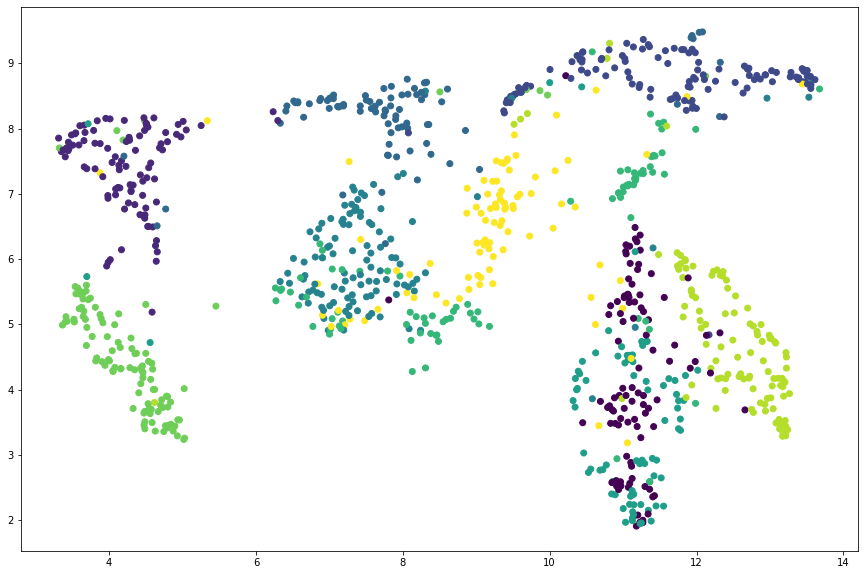

In [21]:
# You may need to install UMAP
# !conda install -c conda-forge umap-learn 

###
#Your code here
###
import umap
%time embed = umap.UMAP().fit_transform(Xs)
scatter2d(embed,ys)


In [22]:
embed

array([[ 4.2988915,  7.0357976],
       [ 6.6268606,  5.422092 ],
       [11.0712385,  2.502149 ],
       ...,
       [ 4.585715 ,  3.4947042],
       [10.000573 ,  8.705576 ],
       [10.965483 ,  6.946445 ]], dtype=float32)

# Random Projections

https://scikit-learn.org/stable/modules/random_projection.html

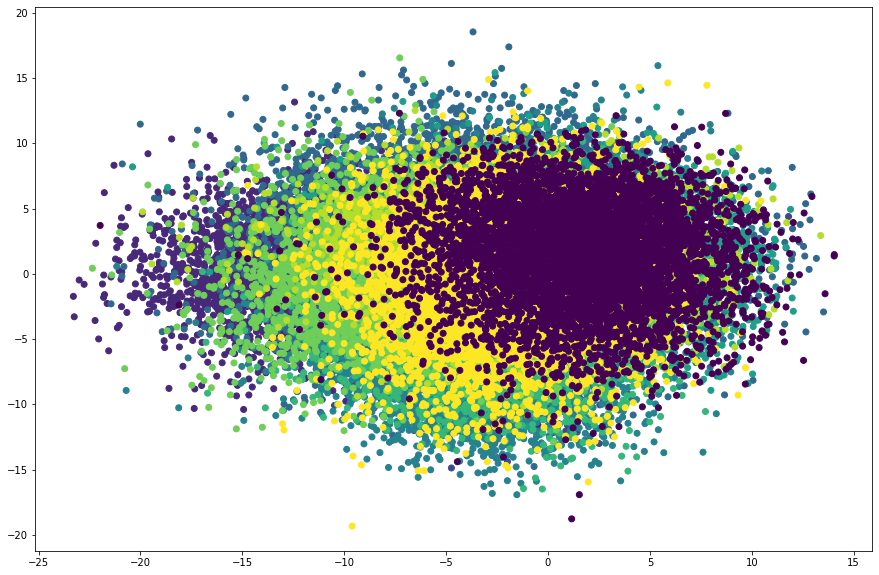

In [23]:
###
#Your code here
###
from sklearn import random_projection

min_dim = random_projection.johnson_lindenstrauss_min_dim(n_samples=X_train.shape[0],eps=0.9)
grp = random_projection.GaussianRandomProjection(n_components=2)

X_new = grp.fit_transform(X_train)

scatter2d(X_new,y_train)

# K-means Clustering with n=10  

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Plot 1. Predicted clusters
Plot 2. Actual clusters


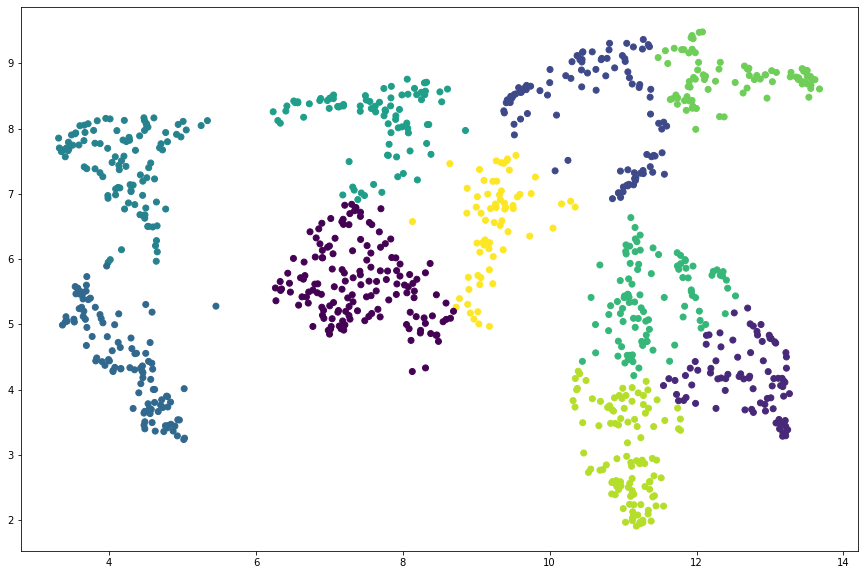

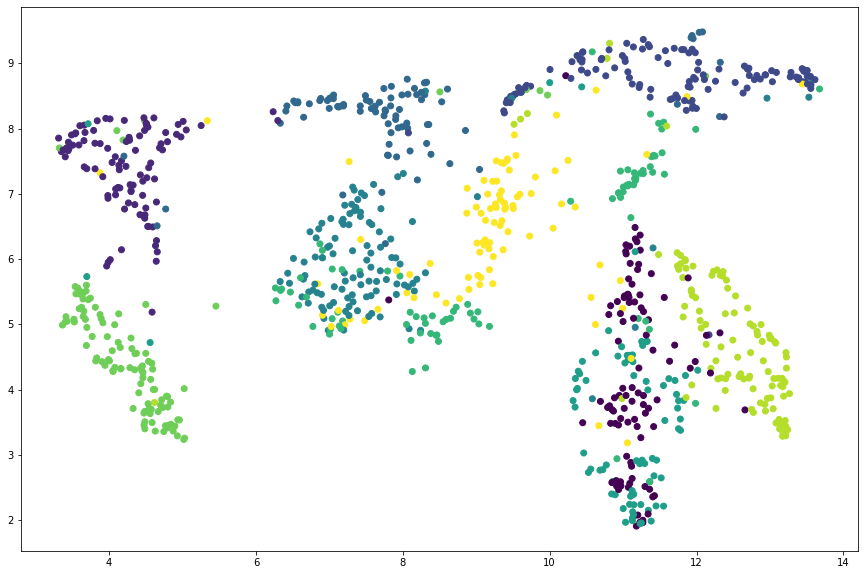

In [24]:
pred_ys = KMeans(n_clusters=10).fit_predict(embed)

print('Plot 1. Predicted clusters')
scatter2d(embed,pred_ys)

print('Plot 2. Actual clusters')
scatter2d(embed,ys)

